# 1.Data

In [1]:
# import library
import numpy as np 
import pandas as pd
import json

## 1.1)영화 정보 데이터

In [2]:
movie = pd.read_csv('the-movies-dataset/movies_metadata.csv', encoding = "UTF-8")

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
movie.head()

adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   
2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3  False                                                NaN  16000000   
4  False  {'id': 96871, 'name': 'Father of the Bride Col...         0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                               homepage     id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story    862  tt0114709                en   
1                                   NaN   8844  tt0113497                en   
2                                   NaN  15602  tt0113228                en   
3                                   NaN  31357  tt0114885                en   
4                                   NaN  11862  tt0113041                en   

                original_title  \
0                    Toy Story   
1                      Jumanji   
2             Grumpier Old Men   
3            Waiting to Exhale   
4  Father of the Bride Part II   

                                            overview  ... release_date  \
0  Led by Woody, Andy's toys live happily in his ...  ...   1995-10-30   
1  When siblings Judy and Peter discover an encha...  ...   1995-12-15   
2  A family wedding reignites the ancient feud be...  ...   1995-12-22   
3  Cheated on, mistreated and stepped on, the wom...  ...   1995-12-22   
4  Just when George Banks has recovered from his ...  ...   1995-02-10   

       revenue runtime                                   spoken_languages  \
0  373554033.0    81.0           [{'iso_639_1': 'en', 'name': 'English'}]   
1  262797249.0   104.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
2          0.0   101.0           [{'iso_639_1': 'en', 'name': 'English'}]   
3   81452156.0   127.0           [{'iso_639_1': 'en', 'name': 'English'}]   
4   76578911.0   106.0           [{'iso_639_1': 'en', 'name': 'English'}]   

     status                                            tagline  \
0  Released                                                NaN   
1  Released          Roll the dice and unleash the excitement!   
2  Released  Still Yelling. Still Fighting. Still Ready for...   
3  Released  Friends are the people who let you be yourself...   
4  Released  Just When His World Is Back To Normal... He's ...   

                         title  video vote_average vote_count  
0                    Toy Story  False          7.7     5415.0  
1                      Jumanji  False          6.9     2413.0  
2             Grumpier Old Men  False          6.5       92.0  
3            Waiting to Exhale  False          6.1       34.0  
4  Father of the Bride Part II  False          5.7      173.0  

[5 rows x 24 columns]

## 1.2)유저 평점 데이터

In [4]:
ratings = pd.read_csv('the-movies-dataset/ratings_small.csv', encoding = "UTF-8")

In [5]:
ratings.head()

userId  movieId  rating   timestamp
0       1       31     2.5  1260759144
1       1     1029     3.0  1260759179
2       1     1061     3.0  1260759182
3       1     1129     2.0  1260759185
4       1     1172     4.0  1260759205

# 2.EDA(탐색적 데이터 분석)

## 2.1)movie

### 2.1.1)변수 선택

In [6]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [7]:
# 사용할 변수 선택
movie = movie[['id', 'imdb_id', 'original_title', 'original_language', 'genres']]
movie = movie.rename(columns={'id':'movie_id'})
movie = movie[movie['original_language'] == 'en']
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32269 entries, 0 to 45465
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   movie_id           32269 non-null  object
 1   imdb_id            32256 non-null  object
 2   original_title     32269 non-null  object
 3   original_language  32269 non-null  object
 4   genres             32269 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


### 2.1.2)데이터 사전[movie]

| 변수  |    설명   |  
|----------|:-------------:|
| movie_id |  영화 id |
| imdb_id |  imdb에 등록된 영화 id |
| original_title | 영화 이름 |
| original_language | 영화 언어 |
| genres | 영화 장르 |

### 2.1.3)탐색

In [8]:
# null제거 -> 평균으로 처리할 수 없는 데이터이므로
movie = movie.dropna(axis=0)
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32256 entries, 0 to 45465
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   movie_id           32256 non-null  object
 1   imdb_id            32256 non-null  object
 2   original_title     32256 non-null  object
 3   original_language  32256 non-null  object
 4   genres             32256 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


In [9]:
# 중복 movie_id 확인
dup_movie = movie[movie.duplicated(subset=['movie_id'], keep=False)]
dup_movie.describe()

movie_id    imdb_id                   original_title original_language  \
count        36         36                               36                36   
unique       18         18                               18                 1   
top      152795  tt0454792  Confessions of a Dangerous Mind                en   
freq          2          2                                2                36   

                                     genres  
count                                    36  
unique                                   17  
top     [{'id': 99, 'name': 'Documentary'}]  
freq                                      4

In [10]:
#중복 imdb_id 확인
dup_movie2 = movie[movie.duplicated(subset=['imdb_id'], keep=False)]
dup_movie2.describe()

movie_id    imdb_id                   original_title original_language  \
count        36         36                               36                36   
unique       18         18                               18                 1   
top      152795  tt0454792  Confessions of a Dangerous Mind                en   
freq          2          2                                2                36   

                                     genres  
count                                    36  
unique                                   17  
top     [{'id': 99, 'name': 'Documentary'}]  
freq                                      4

In [11]:
#중복 title 확인
dup_movie3 = movie[movie.duplicated(subset=['original_title'], keep=False)]
dup_movie3.describe()

movie_id    imdb_id original_title original_language  \
count      3194       3194           3194              3194   
unique     3176       3176           1420                 1   
top      119916  tt0127834         Hamlet                en   
freq          2          2              8              3194   

                               genres  
count                            3194  
unique                            861  
top     [{'id': 18, 'name': 'Drama'}]  
freq                              303

In [12]:
#중복 id, title제거
column_list = ['movie_id','imdb_id','original_title']
for i in column_list:
    movie = movie.drop_duplicates(subset=i, keep="first")

In [13]:
movie.info()
# 30,482 종류의 영화

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30482 entries, 0 to 45465
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   movie_id           30482 non-null  object
 1   imdb_id            30482 non-null  object
 2   original_title     30482 non-null  object
 3   original_language  30482 non-null  object
 4   genres             30482 non-null  object
dtypes: object(5)
memory usage: 1.4+ MB


In [14]:
#중복 movie_id 재확인
dup_movie = movie[movie.duplicated(subset=['movie_id'], keep=False)]
dup_movie.describe()

movie_id imdb_id original_title original_language genres
count         0       0              0                 0      0
unique        0       0              0                 0      0
top         NaN     NaN            NaN               NaN    NaN
freq        NaN     NaN            NaN               NaN    NaN

In [15]:
#중복 imdb_id 재확인
dup_movie2 = movie[movie.duplicated(subset=['imdb_id'], keep=False)]
dup_movie2.describe()

movie_id imdb_id original_title original_language genres
count         0       0              0                 0      0
unique        0       0              0                 0      0
top         NaN     NaN            NaN               NaN    NaN
freq        NaN     NaN            NaN               NaN    NaN

In [16]:
#중복 title 확인
dup_movie3 = movie[movie.duplicated(subset=['original_title'], keep=False)]
dup_movie3.describe()

movie_id imdb_id original_title original_language genres
count         0       0              0                 0      0
unique        0       0              0                 0      0
top         NaN     NaN            NaN               NaN    NaN
freq        NaN     NaN            NaN               NaN    NaN

## 2.2)ratings

### 2.2.1)변수 선택

In [17]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [18]:
# 사용할 변수 선택
ratings = ratings[['userId', 'movieId', 'rating']]
ratings = ratings.rename(columns={'movieId':'movie_id'})
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   userId    100004 non-null  int64  
 1   movie_id  100004 non-null  int64  
 2   rating    100004 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 2.3 MB


In [19]:
ratings.head()

userId  movie_id  rating
0       1        31     2.5
1       1      1029     3.0
2       1      1061     3.0
3       1      1129     2.0
4       1      1172     4.0

### 2.2.2)데이터 사전[ratings]

| 변수  |    설명   |  
|----------|:-------------:|
| userId | 유저 id |
| movie_id | 영화 id |
| rating | 영화 평점 |

### 2.2.3)탐색

In [20]:
# 한 유저가 같은 영화를 여러번 평가했는지 중복 확인
dup_rating = ratings[ratings.duplicated(subset=['userId','movie_id'], keep=False)]
dup_rating.describe()

userId  movie_id  rating
count     0.0       0.0     0.0
mean      NaN       NaN     NaN
std       NaN       NaN     NaN
min       NaN       NaN     NaN
25%       NaN       NaN     NaN
50%       NaN       NaN     NaN
75%       NaN       NaN     NaN
max       NaN       NaN     NaN

In [21]:
# 몇 명의 유저가 몇개의 영화를 평가했는지 확인
import matplotlib.pyplot as plt
import seaborn as sns
user_count = ratings.groupby('userId').count()
user_count = user_count['movie_id']
user_count.describe()

# <1> 671명의 유저가 10만개의 영화 평가 -> 매니악층의 유저 평가를 모아놓은 데이터셋으로 추정

# <2> 평균 : 149, 편차 : 231  -> 1인당 평균 149개의 영화 평가

count     671.000000
mean      149.037258
std       231.226948
min        20.000000
25%        37.000000
50%        71.000000
75%       161.000000
max      2391.000000
Name: movie_id, dtype: float64

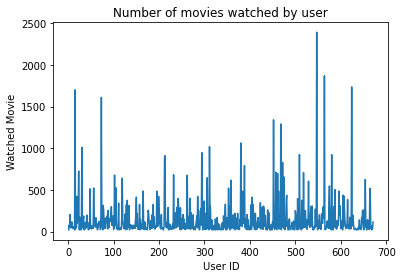

'\n<참고문헌>\n- https://pandas.pydata.org/pandas-docs/version/0.13/visualization.html\n- http://jonathansoma.com/lede/data-studio/matplotlib/changing-the-background-of-a-pandas-matplotlib-graph/\n'

In [22]:
# 671명의 시청 수 그래프
plt.subplots(facecolor='white')
plt.plot(user_count)
plt.title("Number of movies watched by user")
plt.xlabel("User ID")
plt.ylabel("Watched Movie")
plt.show()

'''
<참고문헌>
- https://pandas.pydata.org/pandas-docs/version/0.13/visualization.html
- http://jonathansoma.com/lede/data-studio/matplotlib/changing-the-background-of-a-pandas-matplotlib-graph/
'''

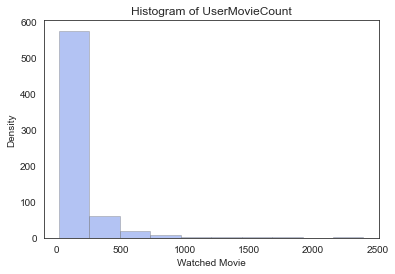

'\n<참고문헌>\n- https://pandas.pydata.org/pandas-docs/version/0.13/visualization.html\n- http://jonathansoma.com/lede/data-studio/matplotlib/changing-the-background-of-a-pandas-matplotlib-graph/\n'

In [23]:
# 시청 분포도
sns.set_style('white')
hist = sns.distplot(user_count,hist=True,kde=False,bins=10,color='royalblue',
                  hist_kws={'edgecolor': 'gray'},kde_kws={'linewidth': 3})
hist.set_title('Histogram of UserMovieCount')
hist.set_xlabel('Watched Movie')
hist.set_ylabel('Density')
plt.show()
'''
<참고문헌>
- https://pandas.pydata.org/pandas-docs/version/0.13/visualization.html
- http://jonathansoma.com/lede/data-studio/matplotlib/changing-the-background-of-a-pandas-matplotlib-graph/
'''

In [24]:
user_count.head()

userId
1     20
2     76
3     51
4    204
5    100
Name: movie_id, dtype: int64

In [25]:
# 시청 수가 1000개가 넘는 유저 탐색 
maniac = user_count[user_count>=1000]
maniac # 따로 이상치라고 판단x

userId
15     1700
30     1011
73     1610
311    1019
380    1063
452    1340
468    1291
547    2391
564    1868
624    1735
Name: movie_id, dtype: int64

# 3.Feature Engineering

## 3.1)movie['movie_id']&ratings['movie_id']

### 3.1.1) 데이터 타입 변경

In [26]:
# movieId : object to int64
movie.movie_id = pd.to_numeric(movie.movie_id, errors='coerce') #ValueError무시
ratings.movie_id = pd.to_numeric(ratings.movie_id, errors='coerce')

## 3.2)movie['genres']

### 3.2.1)json decoding

In [27]:
print(movie['genres'].head())
'''
movie의 genre 객체들은 str인 상태. 각 객체를 str->dict형태로 변환 후, name value만 list에 담아야함
ex) [{'id': 27, 'name': 'Horror'}, ..] -> [[Horror], ..]
'''

0    [{'id': 16, 'name': 'Animation'}, {'id': 35, '...
1    [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
2    [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...
3    [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
4                       [{'id': 35, 'name': 'Comedy'}]
Name: genres, dtype: object


"\nmovie의 genre 객체들은 str인 상태. 각 객체를 str->dict형태로 변환 후, name value만 list에 담아야함\nex) [{'id': 27, 'name': 'Horror'}, ..] -> [[Horror], ..]\n"

In [28]:
# genres의 각 str행 객체를 json str -> dict로 디코딩 후 name key의 value만 genre_list에 담는 함수
def parse_genres(each_genre): # str -> json, str -> dict
    genres = json.loads(each_genre.replace('\'', '"')) # 각 행의 '를 "로 변환 (json decoding)
# Json은 double quotes("")이 기본 
    genres_list = [] 
    for g in genres: #genres = [ {'id': 27, 'name...}, {'id': 9648, 'name...} ]
        genres_list.append(g['name']) #genres의 요소를 하나씩 꺼내서 name value만 genres_list에 담기
    return genres_list

movie['genres'] = movie['genres'].apply(parse_genres) #genres열에 함수 적용 json to list

'''
- http://pythonstudy.xyz/python/article/205-JSON-%EB%8D%B0%EC%9D%B4%ED%83%80
- http://tcpschool.com/json/json_datatype_string
- https://galid1.tistory.com/405
'''

'\n- http://pythonstudy.xyz/python/article/205-JSON-%EB%8D%B0%EC%9D%B4%ED%83%80\n- http://tcpschool.com/json/json_datatype_string\n- https://galid1.tistory.com/405\n'

In [29]:
print(movie['genres'])

0         [Animation, Comedy, Family]
1        [Adventure, Fantasy, Family]
2                   [Romance, Comedy]
3            [Comedy, Drama, Romance]
4                            [Comedy]
                     ...             
45457               [Mystery, Horror]
45458                        [Horror]
45459               [Science Fiction]
45464                              []
45465                              []
Name: genres, Length: 30482, dtype: object


In [30]:
movie.head()

movie_id    imdb_id               original_title original_language  \
0       862  tt0114709                    Toy Story                en   
1      8844  tt0113497                      Jumanji                en   
2     15602  tt0113228             Grumpier Old Men                en   
3     31357  tt0114885            Waiting to Exhale                en   
4     11862  tt0113041  Father of the Bride Part II                en   

                         genres  
0   [Animation, Comedy, Family]  
1  [Adventure, Fantasy, Family]  
2             [Romance, Comedy]  
3      [Comedy, Drama, Romance]  
4                      [Comedy]

## 3.1)movie&ratings

### 3.1.1)병합

In [31]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30482 entries, 0 to 45465
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   movie_id           30482 non-null  int64 
 1   imdb_id            30482 non-null  object
 2   original_title     30482 non-null  object
 3   original_language  30482 non-null  object
 4   genres             30482 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.4+ MB


In [32]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   userId    100004 non-null  int64  
 1   movie_id  100004 non-null  int64  
 2   rating    100004 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 2.3 MB


In [33]:
movie.head()

movie_id    imdb_id               original_title original_language  \
0       862  tt0114709                    Toy Story                en   
1      8844  tt0113497                      Jumanji                en   
2     15602  tt0113228             Grumpier Old Men                en   
3     31357  tt0114885            Waiting to Exhale                en   
4     11862  tt0113041  Father of the Bride Part II                en   

                         genres  
0   [Animation, Comedy, Family]  
1  [Adventure, Fantasy, Family]  
2             [Romance, Comedy]  
3      [Comedy, Drama, Romance]  
4                      [Comedy]

In [34]:
ratings.head()

userId  movie_id  rating
0       1        31     2.5
1       1      1029     3.0
2       1      1061     3.0
3       1      1129     2.0
4       1      1172     4.0

In [35]:
#movie + ratings inner join : movie_id기준으로 두 테이블 조인
data = pd.merge(ratings, movie, on='movie_id', how='inner')
data.head()

userId  movie_id  rating    imdb_id original_title original_language  \
0       1      1371     2.5  tt0084602      Rocky III                en   
1       4      1371     4.0  tt0084602      Rocky III                en   
2       7      1371     3.0  tt0084602      Rocky III                en   
3      19      1371     4.0  tt0084602      Rocky III                en   
4      21      1371     3.0  tt0084602      Rocky III                en   

    genres  
0  [Drama]  
1  [Drama]  
2  [Drama]  
3  [Drama]  
4  [Drama]

In [36]:
data.info()
'''
ratings = 10004개
movie = 30482개
join = 31854개?
'''

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31854 entries, 0 to 31853
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   userId             31854 non-null  int64  
 1   movie_id           31854 non-null  int64  
 2   rating             31854 non-null  float64
 3   imdb_id            31854 non-null  object 
 4   original_title     31854 non-null  object 
 5   original_language  31854 non-null  object 
 6   genres             31854 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 1.9+ MB


'\nratings = 10004개\nmovie = 30482개\njoin = 31854개?\n'

In [37]:
data['original_title'].value_counts()
#조인 테이블에 영화종류는 1973개

Terminator 3: Rise of the Machines    324
The Million Dollar Hotel              311
The 39 Steps                          291
Once Were Warriors                    244
Men in Black II                       224
                                     ... 
Repeaters                               1
Reservation Road                        1
Blood River                             1
Beowulf & Grendel                       1
Fire Birds                              1
Name: original_title, Length: 1973, dtype: int64

In [38]:
data['movie_id'].value_counts()
#영화 테이블에 영화종류는 30482개

296      324
318      311
260      291
527      244
608      224
        ... 
90603      1
8675       1
2486       1
2438       1
2049       1
Name: movie_id, Length: 1973, dtype: int64

조인 테이블 -> 671명의 유저들이 30482개 중 1973개 영화만 평가한 31854rows 테이블

### 3.1.2)피벗 테이블

In [39]:
matrix = data.pivot_table(index='userId', columns='original_title', values='rating')
matrix.info() # 671명의 유저 row

<class 'pandas.core.frame.DataFrame'>
Int64Index: 671 entries, 1 to 671
Columns: 1973 entries, !Women Art Revolution to Мой сводный брат Франкенштейн
dtypes: float64(1973)
memory usage: 10.1 MB


In [40]:
matrix.head()
# row : 671명의 유저
# column : 1973개의 영화

original_title  !Women Art Revolution  'Gator Bait  \
userId                                               
1                                 NaN          NaN   
2                                 NaN          NaN   
3                                 NaN          NaN   
4                                 NaN          NaN   
5                                 NaN          NaN   

original_title  'Twas the Night Before Christmas  10 Items or Less  \
userId                                                               
1                                            NaN               NaN   
2                                            NaN               NaN   
3                                            NaN               NaN   
4                                            NaN               NaN   
5                                            NaN               NaN   

original_title  10 Things I Hate About You  10,000 BC  \
userId                                                  
1                                      NaN        NaN   
2                                      NaN        NaN   
3                                      NaN        NaN   
4                                      NaN        NaN   
5                                      NaN        NaN   

original_title  11'09''01 - September 11  12 + 1  12 Angry Men  1408  ...  \
userId                                                                ...   
1                                    NaN     NaN           NaN   NaN  ...   
2                                    NaN     NaN           NaN   NaN  ...   
3                                    NaN     NaN           NaN   NaN  ...   
4                                    NaN     NaN           NaN   NaN  ...   
5                                    NaN     NaN           NaN   NaN  ...   

original_title  Young and Innocent  Zaat  Zabriskie Point  Zapped Again!  \
userId                                                                     
1                              NaN   NaN              NaN            NaN   
2                              NaN   NaN              NaN            NaN   
3                              3.5   NaN              NaN            NaN   
4                              NaN   NaN              NaN            NaN   
5                              3.5   NaN              NaN            NaN   

original_title  Zardoz  Zodiac  eXistenZ  xXx  ¡Three Amigos!  \
userId                                                          
1                  NaN     NaN       NaN  NaN             NaN   
2                  NaN     NaN       NaN  NaN             NaN   
3                  NaN     NaN       NaN  NaN             NaN   
4                  NaN     NaN       NaN  NaN             NaN   
5                  NaN     NaN       NaN  NaN             NaN   

original_title  Мой сводный брат Франкенштейн  
userId                                         
1                                         NaN  
2                                         NaN  
3                                         NaN  
4                                         NaN  
5                                         NaN  

[5 rows x 1973 columns]

# 4.Recommendation[1st]

## 4.1)Pearson correlation 함수

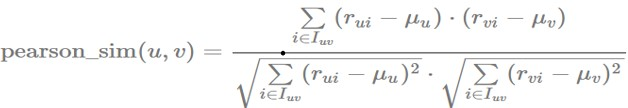

In [41]:
from IPython.display import Image
Image("image/pearson.jpg")

In [42]:
# 장르 가중치(비슷한 장르)와 유저 간 영화의 평점에 따른 피어슨 상관계수를 계산하는 함수
GENRE_WEIGHT = 0.1

def pearsonR(s1, s2):
    s1_c = s1 - s1.mean()
    s2_c = s2 - s2.mean()
    return np.sum(s1_c * s2_c) / np.sqrt(np.sum(s1_c ** 2) * np.sum(s2_c ** 2))

def recommend(input_movie, matrix, n, similar_genre=True):
    input_genres = movie[movie['original_title'] == input_movie]['genres'].iloc(0)[0]

    result = []
    for title in matrix.columns:
        if title == input_movie:
            continue

        # rating comparison
        cor = pearsonR(matrix[input_movie], matrix[title])
        
        # genre comparison
        if similar_genre and len(input_genres) > 0:
            temp_genres = movie[movie['original_title'] == title]['genres'].iloc(0)[0]

            same_count = np.sum(np.isin(input_genres, temp_genres))
            cor += (GENRE_WEIGHT * same_count)
        
        if np.isnan(cor):
            continue
        else:
            result.append((title, '{:.2f}'.format(cor), temp_genres))
            
    result.sort(key=lambda r: r[1], reverse=True)

    return result[:n]
#https://namu.wiki/w/%EC%83%81%EA%B4%80%20%EA%B3%84%EC%88%98?from=%ED%94%BC%EC%96%B4%EC%8A%A8%20%EC%83%81%EA%B4%80%20%EA%B3%84%EC%88%98#s-2
#https://wikidocs.net/46459

## 4.2)첫 번째 추천

### 4.2.1)list

In [43]:
recommend_result = recommend('Star Wars', matrix, 10, similar_genre=True) #영화 매개변수
recommend_list = pd.DataFrame(recommend_result, columns = ['title', 'correlation', 'genres'])
recommend_list #correlation이 비슷한 상황이 잦아서 분별성이 떨어짐

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


title correlation  \
0                        Forbidden Planet        0.53   
1                          Wild Wild West        0.48   
2                              Armageddon        0.47   
3                 Lara Croft: Tomb Raider        0.47   
4             Aliens vs Predator: Requiem        0.46   
5   The Lord of the Rings: The Two Towers        0.46   
6                             Pitch Black        0.43   
7                      Return of the Jedi        0.43   
8  Star Trek VI: The Undiscovered Country        0.43   
9    Indiana Jones and the Temple of Doom        0.40   

                                              genres  
0               [Adventure, Science Fiction, Action]  
1  [Action, Adventure, Comedy, Science Fiction, W...  
2     [Action, Thriller, Science Fiction, Adventure]  
3             [Adventure, Fantasy, Action, Thriller]  
4  [Fantasy, Action, Science Fiction, Thriller, H...  
5                       [Adventure, Fantasy, Action]  
6                [Thriller, Science Fiction, Action]  
7               [Adventure, Action, Science Fiction]  
8     [Science Fiction, Action, Adventure, Thriller]  
9                                [Adventure, Action]

### 4.2.2)narrowing
 - imdb_id와 조인해서 추천 영화들의 실제 평균 평점 탐색

In [44]:
sim_movie = recommend_list['title']
sim_movie
#movie랑 조인해서 imdbID 수집

0                          Forbidden Planet
1                            Wild Wild West
2                                Armageddon
3                   Lara Croft: Tomb Raider
4               Aliens vs Predator: Requiem
5     The Lord of the Rings: The Two Towers
6                               Pitch Black
7                        Return of the Jedi
8    Star Trek VI: The Undiscovered Country
9      Indiana Jones and the Temple of Doom
Name: title, dtype: object

In [45]:
#title 이름 변경
movie = movie.rename(columns={'original_title':'title'})
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30482 entries, 0 to 45465
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   movie_id           30482 non-null  int64 
 1   imdb_id            30482 non-null  object
 2   title              30482 non-null  object
 3   original_language  30482 non-null  object
 4   genres             30482 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.4+ MB


In [46]:
first_rc = pd.DataFrame(sim_movie)
first_rc

title
0                        Forbidden Planet
1                          Wild Wild West
2                              Armageddon
3                 Lara Croft: Tomb Raider
4             Aliens vs Predator: Requiem
5   The Lord of the Rings: The Two Towers
6                             Pitch Black
7                      Return of the Jedi
8  Star Trek VI: The Undiscovered Country
9    Indiana Jones and the Temple of Doom

In [47]:
#movie, first_rc 조인 on title
first_df = first_rc.merge(movie, left_on='title',right_on='title')
first_df

title  movie_id    imdb_id  \
0                        Forbidden Planet       830  tt0049223   
1                          Wild Wild West      8487  tt0120891   
2                              Armageddon        95  tt0120591   
3                 Lara Croft: Tomb Raider      1995  tt0146316   
4             Aliens vs Predator: Requiem       440  tt0758730   
5   The Lord of the Rings: The Two Towers       121  tt0167261   
6                             Pitch Black      2787  tt0134847   
7                      Return of the Jedi      1892  tt0086190   
8  Star Trek VI: The Undiscovered Country       174  tt0102975   
9    Indiana Jones and the Temple of Doom        87  tt0087469   

  original_language                                             genres  
0                en               [Adventure, Science Fiction, Action]  
1                en  [Action, Adventure, Comedy, Science Fiction, W...  
2                en     [Action, Thriller, Science Fiction, Adventure]  
3                en             [Adventure, Fantasy, Action, Thriller]  
4                en  [Fantasy, Action, Science Fiction, Thriller, H...  
5                en                       [Adventure, Fantasy, Action]  
6                en                [Thriller, Science Fiction, Action]  
7                en               [Adventure, Action, Science Fiction]  
8                en     [Science Fiction, Action, Adventure, Thriller]  
9                en                                [Adventure, Action]

In [48]:
# movie_id별 평점 평균
avg_rating = ratings.groupby('movie_id').mean()
avg_rating = avg_rating['rating']
avg_rating

movie_id
1         3.872470
2         3.401869
3         3.161017
4         2.384615
5         3.267857
            ...   
161944    5.000000
162376    4.500000
162542    5.000000
162672    3.000000
163949    5.000000
Name: rating, Length: 9066, dtype: float64

### 4.2.3)1차 추천
 - 상관함수 기반 첫 추천 리스트 10개

In [49]:
first_rating = first_df.merge(avg_rating, left_on='movie_id',right_on='movie_id')
first_data = first_rating[['title','imdb_id','rating']]
first_data

title    imdb_id    rating
0                        Forbidden Planet  tt0049223  3.134615
1                          Wild Wild West  tt0120891  2.750000
2                              Armageddon  tt0120591  3.177419
3                 Lara Croft: Tomb Raider  tt0146316  2.375000
4             Aliens vs Predator: Requiem  tt0758730  3.561111
5   The Lord of the Rings: The Two Towers  tt0167261  3.800000
6                             Pitch Black  tt0134847  3.250000
7                      Return of the Jedi  tt0086190  3.260870
8  Star Trek VI: The Undiscovered Country  tt0102975  2.250000
9    Indiana Jones and the Temple of Doom  tt0087469  1.666667

In [50]:
#1차 추천 받은 영화의 title, imdb_id, rating
first_data = first_rating[['title','imdb_id','rating']]
first_data = first_data.sort_values(by='rating', ascending=False)[:5]

In [51]:
first_data # 5개 중 0,5,2가 내취향이야 -> 이 세 영화에 전부 고평점을 내린 나와 비슷한 유저 탐색

title    imdb_id    rating
5  The Lord of the Rings: The Two Towers  tt0167261  3.800000
4            Aliens vs Predator: Requiem  tt0758730  3.561111
7                     Return of the Jedi  tt0086190  3.260870
6                            Pitch Black  tt0134847  3.250000
2                             Armageddon  tt0120591  3.177419

### 4.2.3)첫 번째 추천 함수의 문제점
 - 추천받은 10개의 영화는 모든 유저들의 평가로 계산된 결과 
 
 -> 다양한 취향의 유저들이 평가 
 
 -> 신뢰성 부족(하지만 다양한 취미의 유저들도 비슷한 평가를 내렸다는 점에서 신빈성 존재)
 
 -> 비슷한 취향의 유저 탐색 필요(크롤링)

# 5.Searching similar user

## 5.1)크롤링 [user_name,user_rating]

In [52]:
import urllib.request
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [53]:
# 첫 추천 영화들의 imdb_id 리스트
imdb_list = first_data['imdb_id'].tolist()
print(imdb_list)

['tt0167261', 'tt0758730', 'tt0086190', 'tt0134847', 'tt0120591']


In [54]:
user_name = [] #시리즈에 담을 리스트 선언
user_rating = []
#list를 사용하는 이유 -> dict는 NaN값을 생략 -> 순서 혼란
for i in imdb_list: #10번 수행
    html = urlopen("https://www.imdb.com/title/" + i + "/reviews?ref_=tt_ql_3") #접근할 html변수
    bs = BeautifulSoup(html, "html.parser") 
    tag = bs.select("#main div.review-container") #태그를 담을 변수
    i_name = []
    i_rating = []
    for j in range(len(tag)): #24번 수행(한 페이지에 24개 리뷰 표시)
        j += 1
        #name
        name_seq = "#main div.lister-list div:nth-child(" + str(j) + ") div.review-container span.display-name-link a"
        name_tag = bs.select(str(name_seq))
        name_list = [] 
        for k in name_tag:
            name_list.append(k.text) #24개의 유저 이름 담기
        i_name.append(name_list) # 첫 번째 영화에 대한 유저 이름 리스트를 1/10에 담기
        #rating
        rating_seq = "#main div.lister-list div:nth-child(" + str(j) + ") div.review-container div.ipl-ratings-bar span:nth-child(2)"
        rating_tag = bs.select(str(rating_seq))
        rating_list = [] 
        for k in rating_tag:
            rating_list.append(k.text) #24개의 유저 레이팅 담기
        i_rating.append(rating_list) # 첫 번째 영화에 대한 유저 레이팅 리스트를 1/10에 담기

    user_name.append(i_name)
    user_rating.append(i_rating)

In [55]:
user_name # [[24명], [24명], [24명], [24명], [24명]] 

[[['Loving_Silence'],
  ['rc_whittle'],
  ['MR_Heraclius'],
  ['Mithrindir'],
  ['docmonster'],
  ['justinrsko'],
  ['joe_unander'],
  ['calcat91355'],
  ['jedsalazar'],
  ['JohnLennon1985'],
  ['Boba_Fett1138'],
  ['tfrizzell'],
  ['otisfirefly2001'],
  ['classicsoncall'],
  ['Barky44'],
  ['grendelkhan'],
  ['jasonmg99'],
  ['dcastor'],
  ['bopdog'],
  ['dreamlanzerl'],
  ['sundog1'],
  ['John_Mclaren'],
  ['fearfulofspiders'],
  ['Theo Robertson'],
  ['FilmCreature']],
 [['call_me_grudge'],
  ['nadjadiamond'],
  ['LordBlacklist'],
  ['emerald_dark'],
  ['frich71-1'],
  ['luke-346'],
  ['mik30'],
  ['ignorepeter'],
  ['matches81'],
  ['Joe_ollie'],
  ['mrforestranger'],
  ['chechrissie'],
  ['alex-1250'],
  ['SUNLION777'],
  ['tibetanpunk'],
  ['littlejimmy835'],
  ['Caustic Pulp'],
  ['pmaglinger'],
  ['ma-cortes'],
  ['agentgates'],
  ['rijoenpial-1'],
  ['alex_dbs'],
  ['twilight-zone-1'],
  ['Joshy-3'],
  ['mail-1030']],
 [['UniqueParticle'],
  ['avenatticlint'],
  ['ivo-cobra8']

## 5.2)정규화

### 5.2.1) user_name

In [56]:
import re
name_to_df = pd.DataFrame.from_records(user_name,columns=None)
name_to_df = name_to_df.T
name_to_df # 24x5 데이터프레임

0                  1                  2  \
0     [Loving_Silence]   [call_me_grudge]   [UniqueParticle]   
1         [rc_whittle]     [nadjadiamond]    [avenatticlint]   
2       [MR_Heraclius]    [LordBlacklist]       [ivo-cobra8]   
3         [Mithrindir]     [emerald_dark]              [P97]   
4         [docmonster]        [frich71-1]     [evanston_dad]   
5         [justinrsko]         [luke-346]       [Aaron_Kyle]   
6        [joe_unander]            [mik30]         [ladysolo]   
7        [calcat91355]      [ignorepeter]      [waynegavin1]   
8         [jedsalazar]        [matches81]         [Gen S2rt]   
9     [JohnLennon1985]        [Joe_ollie]   [ismailkardelen]   
10     [Boba_Fett1138]   [mrforestranger]  [exterminator_99]   
11         [tfrizzell]      [chechrissie]  [ccthemovieman-1]   
12   [otisfirefly2001]        [alex-1250]           [TxMike]   
13    [classicsoncall]       [SUNLION777]        [JTurner82]   
14           [Barky44]      [tibetanpunk]   [deepthinker566]   
15       [grendelkhan]   [littlejimmy835]          [mjw2305]   
16         [jasonmg99]     [Caustic Pulp]         [AlsExGal]   
17           [dcastor]       [pmaglinger]        [Med-Jasta]   
18            [bopdog]        [ma-cortes]       [hothfreeze]   
19      [dreamlanzerl]       [agentgates]     [simonp-43115]   
20           [sundog1]     [rijoenpial-1]   [Lady_Targaryen]   
21      [John_Mclaren]         [alex_dbs]        [DKosty123]   
22  [fearfulofspiders]  [twilight-zone-1]         [Sargebri]   
23    [Theo Robertson]          [Joshy-3]   [luke-a-mcgowan]   
24      [FilmCreature]        [mail-1030]         [Lancer-7]   

                          3                          4  
0   [ParanoidAndroidMarvin]              [madmaxmedia]  
1          [NightfallRaven]  [markokhoward-854-530441]  
2              [charles000]         [michael-stenlund]  
3                [trehling]                [gavin6942]  
4              [atalanta-3]                      [0w0]  
5                 [HAZEL-5]                    [XJoey]  
6         [MovieAddict2016]                  [mjw2305]  
7                [mstomaso]                  [NoArrow]  
8                  [RaziaK]             [bah_cacatule]  
9              [stephie-12]            [buzznzipp1995]  
10             [lopcar1993]          [ccthemovieman-1]  
11          [KristinaElora]       [ercfunk-445-950046]  
12               [bjmarsha]       [polkadotlegwarmers]  
13               [hostagtj]     [olikomerc-513-868262]  
14       [PlanecrazyIkarus]                   [LanieG]  
15       [claudio_carvalho]                 [aero_nut]  
16              [LivingDog]               [fermat1313]  
17               [charchuk]                [bluejamie]  
18        [jamesrupert2014]              [syncopation]  
19         [allegra-sloman]                  [Flinx-2]  
20            [fractalmama]                 [Dave-448]  
21                   [sol-]           [AngelLiloLopez]  
22              [sddavis63]              [Lumpenprole]  
23               [malmroes]                [MAYESY-44]  
24                [efrench]                [Pistol219]

In [57]:
#괄호 제거
for i in range(len(name_to_df.columns)):
    name_to_df[i] = name_to_df[i].str[0]
name_to_df

0                1                2                      3  \
0     Loving_Silence   call_me_grudge   UniqueParticle  ParanoidAndroidMarvin   
1         rc_whittle     nadjadiamond    avenatticlint         NightfallRaven   
2       MR_Heraclius    LordBlacklist       ivo-cobra8             charles000   
3         Mithrindir     emerald_dark              P97               trehling   
4         docmonster        frich71-1     evanston_dad             atalanta-3   
5         justinrsko         luke-346       Aaron_Kyle                HAZEL-5   
6        joe_unander            mik30         ladysolo        MovieAddict2016   
7        calcat91355      ignorepeter      waynegavin1               mstomaso   
8         jedsalazar        matches81         Gen S2rt                 RaziaK   
9     JohnLennon1985        Joe_ollie   ismailkardelen             stephie-12   
10     Boba_Fett1138   mrforestranger  exterminator_99             lopcar1993   
11         tfrizzell      chechrissie  ccthemovieman-1          KristinaElora   
12   otisfirefly2001        alex-1250           TxMike               bjmarsha   
13    classicsoncall       SUNLION777        JTurner82               hostagtj   
14           Barky44      tibetanpunk   deepthinker566       PlanecrazyIkarus   
15       grendelkhan   littlejimmy835          mjw2305       claudio_carvalho   
16         jasonmg99     Caustic Pulp         AlsExGal              LivingDog   
17           dcastor       pmaglinger        Med-Jasta               charchuk   
18            bopdog        ma-cortes       hothfreeze        jamesrupert2014   
19      dreamlanzerl       agentgates     simonp-43115         allegra-sloman   
20           sundog1     rijoenpial-1   Lady_Targaryen            fractalmama   
21      John_Mclaren         alex_dbs        DKosty123                   sol-   
22  fearfulofspiders  twilight-zone-1         Sargebri              sddavis63   
23    Theo Robertson          Joshy-3   luke-a-mcgowan               malmroes   
24      FilmCreature        mail-1030         Lancer-7                efrench   

                          4  
0               madmaxmedia  
1   markokhoward-854-530441  
2          michael-stenlund  
3                 gavin6942  
4                       0w0  
5                     XJoey  
6                   mjw2305  
7                   NoArrow  
8              bah_cacatule  
9             buzznzipp1995  
10          ccthemovieman-1  
11       ercfunk-445-950046  
12       polkadotlegwarmers  
13     olikomerc-513-868262  
14                   LanieG  
15                 aero_nut  
16               fermat1313  
17                bluejamie  
18              syncopation  
19                  Flinx-2  
20                 Dave-448  
21           AngelLiloLopez  
22              Lumpenprole  
23                MAYESY-44  
24                Pistol219

### 5.2.2)user_rating

In [58]:
rating_to_df = pd.DataFrame.from_records(user_rating,columns=None)
rating_to_df = rating_to_df.T
rating_to_df

0    1     2     3     4
0   [10]  [2]  [10]  [10]   [8]
1   [10]  [4]  [10]   [8]   [7]
2   [10]  [1]   [8]    []  [10]
3   [10]  [1]   [9]   [8]   [7]
4     []  [1]  [10]  [10]   [7]
5   [10]  [2]   [9]  [10]   [8]
6   [10]  [1]   [9]   [8]   [8]
7    [9]  [5]  [10]   [8]    []
8   [10]  [2]  [10]  [10]  [10]
9   [10]  [4]  [10]  [10]   [8]
10  [10]  [1]   [7]   [7]    []
11    []  [1]   [9]  [10]   [8]
12    []  [1]    []   [8]   [7]
13  [10]  [1]  [10]  [10]   [9]
14   [9]  [1]  [10]    []    []
15    []  [2]  [10]   [8]  [10]
16  [10]  [9]   [7]  [10]    []
17   [9]  [1]  [10]   [8]   [2]
18  [10]  [5]  [10]   [7]   [4]
19  [10]  [1]  [10]   [7]   [1]
20    []  [1]  [10]  [10]  [10]
21  [10]  [1]   [9]    []  [10]
22  [10]  [3]    []   [7]   [3]
23   [9]  [2]   [5]   [7]  [10]
24  [10]  [1]  [10]  [10]  [10]

In [59]:
for i in range(len(rating_to_df.columns)):
    rating_to_df[i] = rating_to_df[i].str[0]
rating_to_df
#{ [], [] , []...}형식은 NaN값이 당겨짐 -> [[], [], []...]를 사용한 이유

0  1    2    3    4
0    10  2   10   10    8
1    10  4   10    8    7
2    10  1    8  NaN   10
3    10  1    9    8    7
4   NaN  1   10   10    7
5    10  2    9   10    8
6    10  1    9    8    8
7     9  5   10    8  NaN
8    10  2   10   10   10
9    10  4   10   10    8
10   10  1    7    7  NaN
11  NaN  1    9   10    8
12  NaN  1  NaN    8    7
13   10  1   10   10    9
14    9  1   10  NaN  NaN
15  NaN  2   10    8   10
16   10  9    7   10  NaN
17    9  1   10    8    2
18   10  5   10    7    4
19   10  1   10    7    1
20  NaN  1   10   10   10
21   10  1    9  NaN   10
22   10  3  NaN    7    3
23    9  2    5    7   10
24   10  1   10   10   10

## 5.3)병합

In [60]:
# merge 함수
def merge(i):
    df_dict = {"user" : name_to_df[i],
               "rating" : rating_to_df[i]}
    return pd.DataFrame(df_dict)

In [61]:
# merges에 5개의 df 만들어 담기 -> df(username,rating) x 5
merges = {}
for i in range(5):
    merges[i] = pd.DataFrame(merge(i))

merges[0] # 첫 번째 추천 영화에 대한 유저,평점 확인

user rating
0     Loving_Silence     10
1         rc_whittle     10
2       MR_Heraclius     10
3         Mithrindir     10
4         docmonster    NaN
5         justinrsko     10
6        joe_unander     10
7        calcat91355      9
8         jedsalazar     10
9     JohnLennon1985     10
10     Boba_Fett1138     10
11         tfrizzell    NaN
12   otisfirefly2001    NaN
13    classicsoncall     10
14           Barky44      9
15       grendelkhan    NaN
16         jasonmg99     10
17           dcastor      9
18            bopdog     10
19      dreamlanzerl     10
20           sundog1    NaN
21      John_Mclaren     10
22  fearfulofspiders     10
23    Theo Robertson      9
24      FilmCreature     10

## 5.4)매니악 유저 탐색 with concat

In [62]:
merge_row = pd.concat([merges[0],merges[1],merges[2],merges[3],merges[4]],axis=0)
merge_row

user rating
0   Loving_Silence     10
1       rc_whittle     10
2     MR_Heraclius     10
3       Mithrindir     10
4       docmonster    NaN
..             ...    ...
20        Dave-448     10
21  AngelLiloLopez     10
22     Lumpenprole      3
23       MAYESY-44     10
24       Pistol219     10

[125 rows x 2 columns]

In [63]:
merge_row['user'].value_counts() 
# 5개의 영화 중 2개의 영화를 시청한 mjw2305, ccthemovieman-1유저에 대한 세부 탐색 필요

mjw2305            2
ccthemovieman-1    2
chechrissie        1
tibetanpunk        1
John_Mclaren       1
                  ..
twilight-zone-1    1
otisfirefly2001    1
Lancer-7           1
ivo-cobra8         1
jedsalazar         1
Name: user, Length: 123, dtype: int64

In [64]:
merge_col = pd.concat([merges[0],merges[1],merges[2],merges[3],merges[4]],axis=1)
merge_col

user rating             user rating             user rating  \
0     Loving_Silence     10   call_me_grudge      2   UniqueParticle     10   
1         rc_whittle     10     nadjadiamond      4    avenatticlint     10   
2       MR_Heraclius     10    LordBlacklist      1       ivo-cobra8      8   
3         Mithrindir     10     emerald_dark      1              P97      9   
4         docmonster    NaN        frich71-1      1     evanston_dad     10   
5         justinrsko     10         luke-346      2       Aaron_Kyle      9   
6        joe_unander     10            mik30      1         ladysolo      9   
7        calcat91355      9      ignorepeter      5      waynegavin1     10   
8         jedsalazar     10        matches81      2         Gen S2rt     10   
9     JohnLennon1985     10        Joe_ollie      4   ismailkardelen     10   
10     Boba_Fett1138     10   mrforestranger      1  exterminator_99      7   
11         tfrizzell    NaN      chechrissie      1  ccthemovieman-1      9   
12   otisfirefly2001    NaN        alex-1250      1           TxMike    NaN   
13    classicsoncall     10       SUNLION777      1        JTurner82     10   
14           Barky44      9      tibetanpunk      1   deepthinker566     10   
15       grendelkhan    NaN   littlejimmy835      2          mjw2305     10   
16         jasonmg99     10     Caustic Pulp      9         AlsExGal      7   
17           dcastor      9       pmaglinger      1        Med-Jasta     10   
18            bopdog     10        ma-cortes      5       hothfreeze     10   
19      dreamlanzerl     10       agentgates      1     simonp-43115     10   
20           sundog1    NaN     rijoenpial-1      1   Lady_Targaryen     10   
21      John_Mclaren     10         alex_dbs      1        DKosty123      9   
22  fearfulofspiders     10  twilight-zone-1      3         Sargebri    NaN   
23    Theo Robertson      9          Joshy-3      2   luke-a-mcgowan      5   
24      FilmCreature     10        mail-1030      1         Lancer-7     10   

                     user rating                     user rating  
0   ParanoidAndroidMarvin     10              madmaxmedia      8  
1          NightfallRaven      8  markokhoward-854-530441      7  
2              charles000    NaN         michael-stenlund     10  
3                trehling      8                gavin6942      7  
4              atalanta-3     10                      0w0      7  
5                 HAZEL-5     10                    XJoey      8  
6         MovieAddict2016      8                  mjw2305      8  
7                mstomaso      8                  NoArrow    NaN  
8                  RaziaK     10             bah_cacatule     10  
9              stephie-12     10            buzznzipp1995      8  
10             lopcar1993      7          ccthemovieman-1    NaN  
11          KristinaElora     10       ercfunk-445-950046      8  
12               bjmarsha      8       polkadotlegwarmers      7  
13               hostagtj     10     olikomerc-513-868262      9  
14       PlanecrazyIkarus    NaN                   LanieG    NaN  
15       claudio_carvalho      8                 aero_nut     10  
16              LivingDog     10               fermat1313    NaN  
17               charchuk      8                bluejamie      2  
18        jamesrupert2014      7              syncopation      4  
19         allegra-sloman      7                  Flinx-2      1  
20            fractalmama     10                 Dave-448     10  
21                   sol-    NaN           AngelLiloLopez     10  
22              sddavis63      7              Lumpenprole      3  
23               malmroes      7                MAYESY-44     10  
24                efrench     10                Pistol219     10

In [65]:
merge_col[merge_col == 'ccthemovieman-1'] 
#ccthemovieman-1유저는 3,5번 째 영화를 평가

user rating user rating             user rating user rating  \
0   NaN    NaN  NaN    NaN              NaN    NaN  NaN    NaN   
1   NaN    NaN  NaN    NaN              NaN    NaN  NaN    NaN   
2   NaN    NaN  NaN    NaN              NaN    NaN  NaN    NaN   
3   NaN    NaN  NaN    NaN              NaN    NaN  NaN    NaN   
4   NaN    NaN  NaN    NaN              NaN    NaN  NaN    NaN   
5   NaN    NaN  NaN    NaN              NaN    NaN  NaN    NaN   
6   NaN    NaN  NaN    NaN              NaN    NaN  NaN    NaN   
7   NaN    NaN  NaN    NaN              NaN    NaN  NaN    NaN   
8   NaN    NaN  NaN    NaN              NaN    NaN  NaN    NaN   
9   NaN    NaN  NaN    NaN              NaN    NaN  NaN    NaN   
10  NaN    NaN  NaN    NaN              NaN    NaN  NaN    NaN   
11  NaN    NaN  NaN    NaN  ccthemovieman-1    NaN  NaN    NaN   
12  NaN    NaN  NaN    NaN              NaN    NaN  NaN    NaN   
13  NaN    NaN  NaN    NaN              NaN    NaN  NaN    NaN   
14  NaN    NaN  NaN    NaN              NaN    NaN  NaN    NaN   
15  NaN    NaN  NaN    NaN              NaN    NaN  NaN    NaN   
16  NaN    NaN  NaN    NaN              NaN    NaN  NaN    NaN   
17  NaN    NaN  NaN    NaN              NaN    NaN  NaN    NaN   
18  NaN    NaN  NaN    NaN              NaN    NaN  NaN    NaN   
19  NaN    NaN  NaN    NaN              NaN    NaN  NaN    NaN   
20  NaN    NaN  NaN    NaN              NaN    NaN  NaN    NaN   
21  NaN    NaN  NaN    NaN              NaN    NaN  NaN    NaN   
22  NaN    NaN  NaN    NaN              NaN    NaN  NaN    NaN   
23  NaN    NaN  NaN    NaN              NaN    NaN  NaN    NaN   
24  NaN    NaN  NaN    NaN              NaN    NaN  NaN    NaN   

               user rating  
0               NaN    NaN  
1               NaN    NaN  
2               NaN    NaN  
3               NaN    NaN  
4               NaN    NaN  
5               NaN    NaN  
6               NaN    NaN  
7               NaN    NaN  
8               NaN    NaN  
9               NaN    NaN  
10  ccthemovieman-1    NaN  
11              NaN    NaN  
12              NaN    NaN  
13              NaN    NaN  
14              NaN    NaN  
15              NaN    NaN  
16              NaN    NaN  
17              NaN    NaN  
18              NaN    NaN  
19              NaN    NaN  
20              NaN    NaN  
21              NaN    NaN  
22              NaN    NaN  
23              NaN    NaN  
24              NaN    NaN

In [66]:
merge_col[merge_col == 'mjw2305'] 
#mjw2305유저도 3,5번 째 영화를 평가

user rating user rating     user rating user rating     user rating
0   NaN    NaN  NaN    NaN      NaN    NaN  NaN    NaN      NaN    NaN
1   NaN    NaN  NaN    NaN      NaN    NaN  NaN    NaN      NaN    NaN
2   NaN    NaN  NaN    NaN      NaN    NaN  NaN    NaN      NaN    NaN
3   NaN    NaN  NaN    NaN      NaN    NaN  NaN    NaN      NaN    NaN
4   NaN    NaN  NaN    NaN      NaN    NaN  NaN    NaN      NaN    NaN
5   NaN    NaN  NaN    NaN      NaN    NaN  NaN    NaN      NaN    NaN
6   NaN    NaN  NaN    NaN      NaN    NaN  NaN    NaN  mjw2305    NaN
7   NaN    NaN  NaN    NaN      NaN    NaN  NaN    NaN      NaN    NaN
8   NaN    NaN  NaN    NaN      NaN    NaN  NaN    NaN      NaN    NaN
9   NaN    NaN  NaN    NaN      NaN    NaN  NaN    NaN      NaN    NaN
10  NaN    NaN  NaN    NaN      NaN    NaN  NaN    NaN      NaN    NaN
11  NaN    NaN  NaN    NaN      NaN    NaN  NaN    NaN      NaN    NaN
12  NaN    NaN  NaN    NaN      NaN    NaN  NaN    NaN      NaN    NaN
13  NaN    NaN  NaN    NaN      NaN    NaN  NaN    NaN      NaN    NaN
14  NaN    NaN  NaN    NaN      NaN    NaN  NaN    NaN      NaN    NaN
15  NaN    NaN  NaN    NaN  mjw2305    NaN  NaN    NaN      NaN    NaN
16  NaN    NaN  NaN    NaN      NaN    NaN  NaN    NaN      NaN    NaN
17  NaN    NaN  NaN    NaN      NaN    NaN  NaN    NaN      NaN    NaN
18  NaN    NaN  NaN    NaN      NaN    NaN  NaN    NaN      NaN    NaN
19  NaN    NaN  NaN    NaN      NaN    NaN  NaN    NaN      NaN    NaN
20  NaN    NaN  NaN    NaN      NaN    NaN  NaN    NaN      NaN    NaN
21  NaN    NaN  NaN    NaN      NaN    NaN  NaN    NaN      NaN    NaN
22  NaN    NaN  NaN    NaN      NaN    NaN  NaN    NaN      NaN    NaN
23  NaN    NaN  NaN    NaN      NaN    NaN  NaN    NaN      NaN    NaN
24  NaN    NaN  NaN    NaN      NaN    NaN  NaN    NaN      NaN    NaN

In [67]:
#조인하여 해당 유저들이 몇 점을 부여했는지 관찰
mergedStuff = pd.merge(merges[2], merges[4], on=['user'], how='inner')
mergedStuff.head()
#ccthemovieman-1유저는 5번째 영화에는 평점을 주지 않음 -> 부정적인 평가라고 판단
#두 영화 모두에 고평가를 내린 mjw2305가 해당 분야의 매니악 유저일 것으로 유력
#mjw2305유저 세부 탐색 필요

user rating_x rating_y
0  ccthemovieman-1        9      NaN
1          mjw2305       10        8

# 6.Recommendation[2st]

## 6.1)유저 리뷰 분석 함수 
<참고> https://wikidocs.net/24586

In [68]:
from tensorflow.keras.datasets import imdb
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

C:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is depr

### 6.1.1)데이터셋

In [69]:
(X_train, y_train), (X_test, y_test) = imdb.load_data()
# (X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = 10000) #등장 빈도 순위 1~10,000제한

In [70]:
X_train.shape, y_train.shape #25000개의 훈련 데이터

((25000,), (25000,))

In [71]:
X_test.shape, y_test.shape #25000개의 테스트 데이터

((25000,), (25000,))

In [72]:
print('훈련용 리뷰 개수 : {}'.format(len(X_train)))
print('테스트용 리뷰 개수 : {}'.format(len(X_test)))
num_classes = max(y_train) + 1
print('카테고리 : {}'.format(num_classes))

훈련용 리뷰 개수 : 25000
테스트용 리뷰 개수 : 25000
카테고리 : 2


### 6.1.2)상위 빈도수 단어 확인

In [73]:
word_to_index = imdb.get_word_index()
index_to_word={}
for key, value in word_to_index.items():
    index_to_word[value] = key
    
print('빈도수 상위 1번 단어 : {}'.format(index_to_word[420]))

빈도수 상위 1번 단어 : liked


### 6.1.3)상위 빈도수 단어 확인

In [74]:
#token화 되기 전 훈련데이터[0]
print(' '.join([index_to_word[X] for X in X_train[0]]))

the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room titillate it so heart shows to years of every never going villaronga help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but pratfalls to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other tricky in of seen over landed for anyone of gilmore's br show's to whether from than out themselves history he name half some br of 'n odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but whe

### 6.1.4)모델링

In [75]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [76]:
max_len = 300 #문장 길이 맞추기 -> 학습이 부족하면 0이 0.57등으로 편향될 확률 존재
#정한 길이를 초과하면 초과분을 삭제하고, 부족하면 0으로 보충
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [77]:
model = Sequential()
model.add(Embedding(100000, 120)) #단어 집합 크기, 임베딩 후 벡터크기
model.add(LSTM(120))
model.add(Dense(1, activation='sigmoid')) #긍정/부정 이진 분류이므로 활성화 함수로 시그모이드 함수 채택

W0626 19:16:06.041751 11044 deprecation.py:506] From C:\Anaconda\lib\site-packages\tensorflow\python\keras\initializers.py:119: calling RandomUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0626 19:16:06.063730 11044 deprecation.py:506] From C:\Anaconda\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [78]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('sentiment_model', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [79]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1, batch_size=64, callbacks=[es, mc])

W0626 19:16:06.405204 11044 deprecation.py:323] From C:\Anaconda\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 25000 samples, validate on 25000 samples
24960/25000 [============================>.] - ETA: 0s - loss: 0.4267 - acc: 0.7988
Epoch 00001: val_acc improved from -inf to 0.85832, saving model to sentiment_model
25000/25000 [==============================] - 261s 10ms/sample - loss: 0.4264 - acc: 0.7991 - val_loss: 0.3335 - val_acc: 0.8583


In [80]:
loaded_model = load_model('sentiment_model')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

W0626 19:20:28.609368 11044 deprecation.py:506] From C:\Anaconda\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0626 19:20:28.611304 11044 deprecation.py:506] From C:\Anaconda\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling Orthogonal.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0626 19:20:28.611551 11044 deprecation.py:506] From C:\Anaconda\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instruc

25000/25000 [==============================] - 57s 2ms/sample - loss: 0.3335 - acc: 0.8583

 테스트 정확도: 0.8583


## 6.2)유저 리뷰 크롤링
<참고> https://wikidocs.net/24586

In [81]:
maniac_url = 'https://www.imdb.com/user/ur3174947/?ref_=tt_urv'
page = urlopen(maniac_url)
bs = BeautifulSoup(page, "html.parser")
#main > div.widgets > div.widget.article.reviews > div > div:nth-child(2) > h3 > a
tag = bs.select("#main > div.widgets > div.widget.article.reviews > div")

In [82]:
#영화 이름
movie_tags = bs.select("h3 > a")
movie_names = [i.text for i in movie_tags]
movie_names[24]

'Next'

In [83]:
#영화 리뷰
review_tags = bs.find('div', class_='reviews')
review_tags = bs.findAll('p')
reviews = [i.text for i in review_tags]
reviews = reviews[:25]
reviews[24]

'Cris Johnson (Nicolas Cage) earns a living in a Las Vegas magic act, where the magic is no illusion, he really can see up to two minutes into the future, which has drawn the attention of FBI agent Callie Ferris (Julianne Moore) and she wants him to help foil a plot to detonate a nuclear bomb in the heart of Los Angles. Johnson and his unsuspecting girl (Jessica Biel), who is destined to be in his future, become caught up in race against time that only he can stop.Despite its flaws, Next becomes a very compelling action thriller, that sees a really good concept play out with style. I found it was great fun to watch, and i particularly enjoyed the way the directors utilised the gift in Cages character; its was pretty original and very cool; so much so that it glossed over any flaws very well.8/10 great fun action'

In [84]:
#df[name,reivew]
name_review_data = {"movie" : movie_names,
                    "review" : reviews}
name_review = pd.DataFrame(name_review_data)
#훈련 데이터 사전에 등록되지 않은 단어 제거
name_review['review'] = name_review['review'].str.replace('vengenance','')
name_review['review'] = name_review['review'].str.replace('enought','')
name_review['review'] = name_review['review'].str.replace('boobfest','')
name_review['review'] = name_review['review'].str.replace('lol9','')
name_review['review'] = name_review['review'].str.replace('annimation','')
name_review['review'] = name_review['review'].str.replace('me4','')
name_review['review'] = name_review['review'].str.replace('dispells','')
name_review['review'] = name_review['review'].str.replace('Salvavation','')
name_review['review'] = name_review['review'].str.replace('adifferent','')
name_review['review'] = name_review['review'].str.replace('Upload','')
name_review['review'] = name_review['review'].str.replace('seemlessly','')
name_review['review'] = name_review['review'].str.replace('far','')
name_review['review'] = name_review['review'].str.replace('attrocity','')
name_review['review'] = name_review['review'].str.replace('testiment','')
name_review['review'] = name_review['review'].str.replace('daren','')
name_review['review'] = name_review['review'].str.replace('Hypercube','')
name_review['review'] = name_review['review'].str.replace('lockdown','')
name_review['review'] = name_review['review'].str.replace('Skipp','')
name_review['review'] = name_review['review'].str.replace('Kotzwinkle','')
name_review['review'] = name_review['review'].str.replace('Callie','')
name_review['review'] = name_review['review'].str.replace('foreword','')
name_review['review'] = name_review['review'].str.replace('Nia','')
name_review['review'] = name_review['review'].str.replace('Vardalos','')
name_review['review'] = name_review['review'].str.replace('Kindgom','')
name_review['review'] = name_review['review'].str.replace('Matterson','')
name_review.head()

movie  \
0                                   Toy Story 4   
1                                   Toy Story 3   
2                                     Toy Story   
3                                   I Am Legend   
4  Star Wars: Episode III - Revenge of the Sith   

                                              review  
0  This forth, and hopefully, final outing for Wo...  
1  I have always loved these characters and once ...  
2  Wow, is this movie really 25 years old now!I r...  
3  I watched this movie years ago, and very delib...  
4  Revenge of the Sith is now a classic piece of ...

## 6.3)감정 분석

In [85]:
#리뷰의 평균 단어 개수
length = [len(i.split()) for i in name_review['review']]
length = np.array(length)
length.mean() #maxlen에 참고

101.8

### 6.3.1) 리뷰 정규화

In [86]:
name_review["review"][0]

"This forth, and hopefully, final outing for Woody and the gang dissapointed me greatly I am sad to say!My issue is that the trilogy as it stood was genius and had run full circle to a truely brilliant conclusion!Toy Story 4 adds nothing new or fresh, it lacks the heart of the other films where it truely matters and it felt like the first milking of the franchise!Don't get me wrong, I laughed in parts, some of the scenes were pretty good and it was simply brilliantly animated.But, for me, it didn't need to be made and left me feeling extremely MEH!!!!"

In [87]:
#정규화
indexs = []
for i in name_review["review"]:
    i = re.sub("[^\w]", " ",i).split()
    i = [x.lower() for x in i]
    i = [word_to_index[x] for x in i]
    i = np.array(i) # i(list) -> array
    indexs.append(i)
indexs = np.array(indexs) # indexs(list) -> array

indexs.shape

(25,)

In [88]:
indexs[0]

array([   11,  2586,     2,  2360,   474,  5672,    15,  2289,     2,
           1,  1363, 33534,    69,  3055,    10,   241,   616,     5,
         132,    58,  1831,     6,    12,     1,  2352,    14,     9,
        3402,    13,  1259,     2,    66,   518,   365,  4243,     5,
           3, 21519,   527,  1171,  2885,    62,   467,  1605,   161,
         159,    39,  1473,     9,  1500,     1,   480,     4,     1,
          82,   105,   118,     9, 21519,  2291,     2,     9,   418,
          37,     1,    83, 19283,     4,     1,  3132,  1558,   827,
          76,    69,   352,    10,  1495,     8,   528,    46,     4,
           1,   136,    68,   181,    49,     2,     9,    13,   328,
        2102,  1122,    18,    15,    69,     9, 15496,   827,   356,
           5,    27,    90,     2,   314,    69,   544,   573, 26147])

In [89]:
index_maxlen = pad_sequences(indexs, maxlen=101) # 평균으로 문장 길이 균일화
index_maxlen.shape

(25, 101)

### 6.3.2) 예측

In [90]:
#예측
predicts = [loaded_model.predict(i) for i in indexs]
predicts[0]

array([[0.5069408 ],
       [0.5050207 ],
       [0.4961085 ],
       [0.5054615 ],
       [0.48894867],
       [0.34563628],
       [0.4690467 ],
       [0.40974882],
       [0.4961085 ],
       [0.5954045 ],
       [0.48020768],
       [0.48169833],
       [0.4707434 ],
       [0.7006737 ],
       [0.5062654 ],
       [0.31814855],
       [0.25153908],
       [0.53862554],
       [0.5046823 ],
       [0.5234926 ],
       [0.5578947 ],
       [0.5151209 ],
       [0.56781495],
       [0.5954045 ],
       [0.61896557],
       [0.4697098 ],
       [0.5425703 ],
       [0.47174564],
       [0.49604207],
       [0.54297024],
       [0.4961085 ],
       [0.5101451 ],
       [0.63096577],
       [0.37623864],
       [0.4973281 ],
       [0.53862554],
       [0.5029195 ],
       [0.453186  ],
       [0.29633033],
       [0.33290666],
       [0.5080796 ],
       [0.49131298],
       [0.5183239 ],
       [0.41750246],
       [0.38687968],
       [0.49087515],
       [0.4848033 ],
       [0.598

In [91]:
#점수
scores = [i.mean() for i in predicts]
scores[0]

0.5051343

In [92]:
#데이터 프레임에 삽입
name_review['sentiment_score'] = scores

In [93]:
#평가 함수 
def evaluate(review):
    test_score = review.mean()
    if(test_score > 0.5):
        return 1 #긍정
    else:
        return 0 #부정

In [94]:
evaluation = [evaluate(i) for i in predicts]

In [107]:
#add evaluate to df
name_review['evaluation'] = evaluation

In [120]:
#유저가 리뷰에 평가한 점수 ex) it was nice movie 8/10
real_score = [None,None,None,8,10,10,None,None,7,6,None,10,4,None,None,8,None,None,10,8,4,4,5,7,8]
name_review['user_score'] = real_score

In [121]:
name_review

movie  \
0                                     Toy Story 4   
1                                     Toy Story 3   
2                                       Toy Story   
3                                     I Am Legend   
4    Star Wars: Episode III - Revenge of the Sith   
5                                    True Romance   
6             Best of the Best 3: No Turning Back   
7                             Best of the Best II   
8                                           Teeth   
9                                      Piranha 3D   
10                                       Repo Men   
11                                     District 9   
12                              The Addams Family   
13                          Terminator: Dark Fate   
14                             Terminator Genisys   
15                           Terminator Salvation   
16                                         Upload   
17                                       The Mist   
18                                      Eden Lake   
19                                         Onward   
20                                      Cube Zero   
21     A Nightmare on Elm Street: The Dream Child   
22  A Nightmare on Elm Street 4: The Dream Master   
23                            Night at the Museum   
24                                           Next   

                                               review  sentiment_score  \
0   This forth, and hopefully, final outing for Wo...         0.505134   
1   I have always loved these characters and once ...         0.511947   
2   Wow, is this movie really 25 years old now!I r...         0.511138   
3   I watched this movie years ago, and very delib...         0.502312   
4   Revenge of the Sith is now a classic piece of ...         0.506502   
5   With a Stellar cast, slick direction, terrific...         0.513968   
6   This outing only has Phillip Rhee from the ori...         0.506817   
7   I really enjoyed the first film in the series ...         0.505763   
8   My expectations were very low, but i was intri...         0.505244   
9   Expectations were low, alcohol to blood level ...         0.532895   
10  Didn't have a clue this movie would be as good...         0.501179   
11  10 minutes in and my wife and I were like, "ar...         0.506789   
12  I don't know if it was the transition to  or w...         0.497146   
13  Seriously, I have enjoyed the whole franchise!...         0.501972   
14  The burning question is did this really need t...         0.501518   
15  Terminator  takes us to the inevitable and let...         0.493548   
16  I've not quite finished season 1, but I am alr...         0.500536   
17  I have only watched the first 5 episodes, but ...         0.492061   
18  Firstly, Eden Lake is not for everyone! It hit...         0.505571   
19  I new nothing about this film and went in to i...         0.501895   
20  Surprisingly I did actually quite enjoy this m...         0.503045   
21  This time Stephen Hopkins (Director) and (John...         0.498278   
22  After huge success with the first outing, Wes ...         0.498523   
23  When Larry Daley (Ben Stiller) is hired as the...         0.506637   
24  Cris Johnson (Nicolas Cage) earns a living in ...         0.508986   

    evaluation  user_score  
0            1         NaN  
1            1         NaN  
2            1         NaN  
3            1         8.0  
4            1        10.0  
5            1        10.0  
6            1         NaN  
7            1         NaN  
8            1         7.0  
9            1         6.0  
10           1         NaN  
11           1        10.0  
12           0         4.0  
13           1         NaN  
14           1         NaN  
15           0         8.0  
16           1         NaN  
17           0         NaN  
18           1        10.0  
19           1         8.0  
20           1         4.0  
21           0         4.0  
22           0         5.0  
23           1         7.0  
24           1 

In [122]:
#감정 분석 기준 정렬
maniac_favorite_sentiment = name_review.sort_values(by='sentiment_score', ascending=False)
maniac_favorite_sentiment

movie  \
9                                      Piranha 3D   
5                                    True Romance   
1                                     Toy Story 3   
2                                       Toy Story   
24                                           Next   
6             Best of the Best 3: No Turning Back   
11                                     District 9   
23                            Night at the Museum   
4    Star Wars: Episode III - Revenge of the Sith   
7                             Best of the Best II   
18                                      Eden Lake   
8                                           Teeth   
0                                     Toy Story 4   
20                                      Cube Zero   
3                                     I Am Legend   
13                          Terminator: Dark Fate   
19                                         Onward   
14                             Terminator Genisys   
10                                       Repo Men   
16                                         Upload   
22  A Nightmare on Elm Street 4: The Dream Master   
21     A Nightmare on Elm Street: The Dream Child   
12                              The Addams Family   
15                           Terminator Salvation   
17                                       The Mist   

                                               review  sentiment_score  \
9   Expectations were low, alcohol to blood level ...         0.532895   
5   With a Stellar cast, slick direction, terrific...         0.513968   
1   I have always loved these characters and once ...         0.511947   
2   Wow, is this movie really 25 years old now!I r...         0.511138   
24  Cris Johnson (Nicolas Cage) earns a living in ...         0.508986   
6   This outing only has Phillip Rhee from the ori...         0.506817   
11  10 minutes in and my wife and I were like, "ar...         0.506789   
23  When Larry Daley (Ben Stiller) is hired as the...         0.506637   
4   Revenge of the Sith is now a classic piece of ...         0.506502   
7   I really enjoyed the first film in the series ...         0.505763   
18  Firstly, Eden Lake is not for everyone! It hit...         0.505571   
8   My expectations were very low, but i was intri...         0.505244   
0   This forth, and hopefully, final outing for Wo...         0.505134   
20  Surprisingly I did actually quite enjoy this m...         0.503045   
3   I watched this movie years ago, and very delib...         0.502312   
13  Seriously, I have enjoyed the whole franchise!...         0.501972   
19  I new nothing about this film and went in to i...         0.501895   
14  The burning question is did this really need t...         0.501518   
10  Didn't have a clue this movie would be as good...         0.501179   
16  I've not quite finished season 1, but I am alr...         0.500536   
22  After huge success with the first outing, Wes ...         0.498523   
21  This time Stephen Hopkins (Director) and (John...         0.498278   
12  I don't know if it was the transition to  or w...         0.497146   
15  Terminator  takes us to the inevitable and let...         0.493548   
17  I have only watched the first 5 episodes, but ...         0.492061   

    evaluation  user_score  
9            1         6.0  
5            1        10.0  
1            1         NaN  
2            1         NaN  
24           1         8.0  
6            1         NaN  
11           1        10.0  
23           1         7.0  
4            1        10.0  
7            1         NaN  
18           1        10.0  
8            1         7.0  
0            1         NaN  
20           1         4.0  
3            1         8.0  
13           1         NaN  
19           1         8.0  
14           1         NaN  
10           1         NaN  
16           1         NaN  
22           0         5.0  
21           0         4.0  
12           0         4.0  
15           0         8.0  
17           0 

In [127]:
#실제 유저 평점 기준 정렬
maniac_favorite_score = name_review.sort_values(by='user_score', ascending=False)
maniac_favorite_score

movie  \
4    Star Wars: Episode III - Revenge of the Sith   
5                                    True Romance   
11                                     District 9   
18                                      Eden Lake   
3                                     I Am Legend   
15                           Terminator Salvation   
19                                         Onward   
24                                           Next   
8                                           Teeth   
23                            Night at the Museum   
9                                      Piranha 3D   
22  A Nightmare on Elm Street 4: The Dream Master   
12                              The Addams Family   
20                                      Cube Zero   
21     A Nightmare on Elm Street: The Dream Child   
0                                     Toy Story 4   
1                                     Toy Story 3   
2                                       Toy Story   
6             Best of the Best 3: No Turning Back   
7                             Best of the Best II   
10                                       Repo Men   
13                          Terminator: Dark Fate   
14                             Terminator Genisys   
16                                         Upload   
17                                       The Mist   

                                               review  sentiment_score  \
4   Revenge of the Sith is now a classic piece of ...         0.506502   
5   With a Stellar cast, slick direction, terrific...         0.513968   
11  10 minutes in and my wife and I were like, "ar...         0.506789   
18  Firstly, Eden Lake is not for everyone! It hit...         0.505571   
3   I watched this movie years ago, and very delib...         0.502312   
15  Terminator  takes us to the inevitable and let...         0.493548   
19  I new nothing about this film and went in to i...         0.501895   
24  Cris Johnson (Nicolas Cage) earns a living in ...         0.508986   
8   My expectations were very low, but i was intri...         0.505244   
23  When Larry Daley (Ben Stiller) is hired as the...         0.506637   
9   Expectations were low, alcohol to blood level ...         0.532895   
22  After huge success with the first outing, Wes ...         0.498523   
12  I don't know if it was the transition to  or w...         0.497146   
20  Surprisingly I did actually quite enjoy this m...         0.503045   
21  This time Stephen Hopkins (Director) and (John...         0.498278   
0   This forth, and hopefully, final outing for Wo...         0.505134   
1   I have always loved these characters and once ...         0.511947   
2   Wow, is this movie really 25 years old now!I r...         0.511138   
6   This outing only has Phillip Rhee from the ori...         0.506817   
7   I really enjoyed the first film in the series ...         0.505763   
10  Didn't have a clue this movie would be as good...         0.501179   
13  Seriously, I have enjoyed the whole franchise!...         0.501972   
14  The burning question is did this really need t...         0.501518   
16  I've not quite finished season 1, but I am alr...         0.500536   
17  I have only watched the first 5 episodes, but ...         0.492061   

    evaluation  user_score  
4            1        10.0  
5            1        10.0  
11           1        10.0  
18           1        10.0  
3            1         8.0  
15           0         8.0  
19           1         8.0  
24           1         8.0  
8            1         7.0  
23           1         7.0  
9            1         6.0  
22           0         5.0  
12           0         4.0  
20           1         4.0  
21           0         4.0  
0            1         NaN  
1            1         NaN  
2            1         NaN  
6            1         NaN  
7            1         NaN  
10           1         NaN  
13           1         NaN  
14           1         NaN  
16           1         NaN  
17           0 

In [128]:
maniac_movie = maniac_favorite_score[['movie','evaluation']]
maniac_movie = pd.DataFrame(maniac_movie)
maniac_movie

movie  evaluation
4    Star Wars: Episode III - Revenge of the Sith           1
5                                    True Romance           1
11                                     District 9           1
18                                      Eden Lake           1
3                                     I Am Legend           1
15                           Terminator Salvation           0
19                                         Onward           1
24                                           Next           1
8                                           Teeth           1
23                            Night at the Museum           1
9                                      Piranha 3D           1
22  A Nightmare on Elm Street 4: The Dream Master           0
12                              The Addams Family           0
20                                      Cube Zero           1
21     A Nightmare on Elm Street: The Dream Child           0
0                                     Toy Story 4           1
1                                     Toy Story 3           1
2                                       Toy Story           1
6             Best of the Best 3: No Turning Back           1
7                             Best of the Best II           1
10                                       Repo Men           1
13                          Terminator: Dark Fate           1
14                             Terminator Genisys           1
16                                         Upload           1
17                                       The Mist           0

In [129]:
movie_genres = movie[['title','genres']]
movie_genres = movie_genres.rename(columns={'title':'movie'})
movie_genres

movie                        genres
0                        Toy Story   [Animation, Comedy, Family]
1                          Jumanji  [Adventure, Fantasy, Family]
2                 Grumpier Old Men             [Romance, Comedy]
3                Waiting to Exhale      [Comedy, Drama, Romance]
4      Father of the Bride Part II                      [Comedy]
...                            ...                           ...
45457    Shadow of the Blair Witch             [Mystery, Horror]
45458          The Burkittsville 7                      [Horror]
45459              Caged Heat 3000             [Science Fiction]
45464          Satana likuyushchiy                            []
45465                     Queerama                            []

[30482 rows x 2 columns]

In [130]:
inter_movie = pd.merge(maniac_movie, movie_genres, on='movie', how='inner')
inter_movie

movie  evaluation  \
0    Star Wars: Episode III - Revenge of the Sith           1   
1                                    True Romance           1   
2                                      District 9           1   
3                                       Eden Lake           1   
4                                     I Am Legend           1   
5                            Terminator Salvation           0   
6                                            Next           1   
7                                           Teeth           1   
8                             Night at the Museum           1   
9                                      Piranha 3D           1   
10  A Nightmare on Elm Street 4: The Dream Master           0   
11                              The Addams Family           0   
12                                      Cube Zero           1   
13                                    Toy Story 3           1   
14                                      Toy Story           1   
15            Best of the Best 3: No Turning Back           1   
16                                       Repo Men           1   
17                             Terminator Genisys           1   
18                                       The Mist           0   

                                               genres  
0                [Science Fiction, Adventure, Action]  
1                  [Action, Thriller, Crime, Romance]  
2                                   [Science Fiction]  
3                                  [Horror, Thriller]  
4   [Drama, Horror, Action, Thriller, Science Fict...  
5                 [Action, Science Fiction, Thriller]  
6                 [Action, Science Fiction, Thriller]  
7                                    [Comedy, Horror]  
8        [Action, Adventure, Comedy, Family, Fantasy]  
9                                    [Comedy, Horror]  
10                                 [Horror, Thriller]  
11                          [Horror, Comedy, Fantasy]  
12               [Mystery, Science Fiction, Thriller]  
13                        [Animation, Family, Comedy]  
14                        [Animation, Comedy, Family]  
15                                           [Action]  
16         [Action, Science Fiction, Thriller, Crime]  
17     [Science Fiction, Action, Thriller, Adventure]  
18                [Science Fiction, Horror, Thriller]

## <결과>
1. 피어슨 상관계수를 이용한 유저 평점 기반 추천 함수로 1차 추천 

2. 1차 추천을 기반으로 크롤링을 통해 나와 비슷한 유저 발견

3. 해당 유저에 대한 상세 크롤링과 감정 분석을 통한 2차 추천